In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [10]:
logisticX = pd.read_csv('../data/q3/logisticX.csv', header=None).to_numpy()
logisticY = pd.read_csv('../data/q3/logisticY.csv', header=None).to_numpy()

In [11]:
def normalize(X):
    mean = np.mean(X, axis=0)
    stdev = np.std(X, axis=0)
    X = (X-mean)/stdev
    return (X, mean, stdev)

In [12]:
(normX, meanX, stdevX) = normalize(logisticX)
Y = logisticY
X = np.hstack((np.ones((normX.shape[0], 1)), normX))

In [15]:
def signmoid(X, theta):
    return 1/(1+np.exp(-np.dot(X, theta)))

In [20]:
def newton(X, theta, Y, max_iterations):
    theta_hist = []
    for i in range(max_iterations):
        theta_hist.append(np.array(theta))
        h = signmoid(X, theta)
        D = np.diag((h*(1-h)))
        H = X.T @ D @ X
        print(H)
        h_mat = np.array([h]).T
        H_inv = np.linalg.inv(H)
        grad = X.T@(h_mat - Y)
        theta = theta - (H_inv@grad).reshape(theta.shape)
    return (theta, theta_hist)

In [21]:
theta = np.zeros(X.shape[1])
(theta_new, theta_hist) = newton(X, theta, Y, 10)
theta_hist

[[ 2.50000000e+01 -2.88657986e-15  1.66533454e-15]
 [-2.88657986e-15  2.50000000e+01 -1.23957811e+01]
 [ 1.66533454e-15 -1.23957811e+01  2.50000000e+01]]
[[16.67015307 -0.63692543  0.68514297]
 [-0.63692543 11.56496155 -3.01113727]
 [ 0.68514297 -3.01113727 11.47318617]]
[[11.29505368 -0.96940762  0.85973513]
 [-0.96940762  6.01483528 -0.05014815]
 [ 0.85973513 -0.05014815  5.63497973]]
[[ 8.46760424 -1.13703868  0.86211377]
 [-1.13703868  3.86622949  0.7118158 ]
 [ 0.86211377  0.7118158   3.42761171]]
[[ 7.28660058 -1.1948712   0.8472037 ]
 [-1.1948712   3.10776118  0.89744865]
 [ 0.8472037   0.89744865  2.69843806]]
[[ 6.99158812 -1.20588864  0.8460042 ]
 [-1.20588864  2.92894387  0.93296816]
 [ 0.8460042   0.93296816  2.53831995]]
[[ 6.97036051 -1.20668975  0.84627142]
 [-1.20668975  2.91604819  0.93537903]
 [ 0.84627142  0.93537903  2.52729308]]
[[ 6.97024698 -1.20669461  0.84627423]
 [-1.20669461  2.9159784   0.93539195]
 [ 0.84627423  0.93539195  2.52723482]]
[[ 6.97024698 -1.206

[array([0., 0., 0.]),
 array([ 1.64901696e-16,  8.97341408e-01, -9.20112283e-01]),
 array([ 0.0916248 ,  1.54658764, -1.57249997]),
 array([ 0.22925374,  2.10393545, -2.18620038]),
 array([ 0.35177461,  2.46348281, -2.59033635]),
 array([ 0.39743593,  2.57939935, -2.71602845]),
 array([ 0.40123187,  2.58849794, -2.7255376 ]),
 array([ 0.40125316,  2.5885477 , -2.72558849]),
 array([ 0.40125316,  2.5885477 , -2.72558849]),
 array([ 0.40125316,  2.5885477 , -2.72558849])]

In [22]:
Y.shape

(100, 1)

In [ ]:
Y

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [23]:
X1 = X[Y[:, 0] == 1]
X0 = X[Y[:, 0] == 0]
X1

array([[ 1.        ,  0.09150086, -1.34422853],
       [ 1.        , -0.93099654, -0.73990284],
       [ 1.        , -0.10767612, -1.10150342],
       [ 1.        ,  0.88699564, -2.06750178],
       [ 1.        ,  0.08816481, -1.49612096],
       [ 1.        ,  1.38944932, -2.15235104],
       [ 1.        ,  0.24359412,  0.48590583],
       [ 1.        ,  0.84430945, -0.56249075],
       [ 1.        ,  0.21432792, -0.30289672],
       [ 1.        ,  1.14895089, -0.58829877],
       [ 1.        , -0.57949885,  0.07240086],
       [ 1.        ,  1.91745405,  0.35823545],
       [ 1.        ,  0.50175841, -1.03013488],
       [ 1.        ,  0.56324776, -1.43390778],
       [ 1.        , -0.41671508,  0.06194789],
       [ 1.        ,  0.6669684 ,  0.88701141],
       [ 1.        ,  0.61472898, -0.89590437],
       [ 1.        , -0.24900306, -1.28605236],
       [ 1.        ,  1.12203509, -0.49624057],
       [ 1.        ,  2.19934975, -1.41797602],
       [ 1.        ,  1.57414483, -1.299

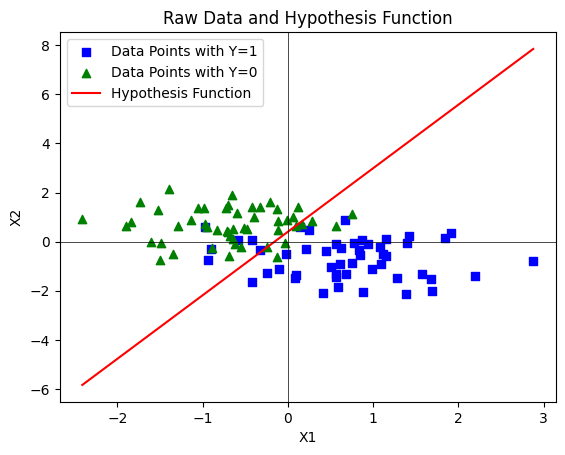

In [24]:
plt.scatter(X1[:, 1], X1[:, 2], marker='s', color='blue', label='Data Points with Y=1')
plt.scatter(X0[:, 1], X0[:, 2], marker='^', color='green', label='Data Points with Y=0')
x_range = np.linspace(min(X[:, 1]), max(X[:, 1]), 100)
y_pred = theta_new[0] + theta_new[1]*x_range
plt.plot(x_range, y_pred, color='red', label='Hypothesis Function')
plt.axhline(0, color='black', linewidth=0.5)  # Horizontal line at y=0
plt.axvline(0, color='black', linewidth=0.5)  # Vertical line at x=0
# Set appropriate axis limits
x_min = min(X[:, 1])
x_max = max(X[:, 1])
y_min = min(Y[:, 0])
y_max = max(Y[:, 0])
# y_center = 1  # Center of y-axis values
# Set x-axis and y-axis limits based on data ranges and centering of y-axis
# plt.xlim(x_min, x_max)
# plt.ylim(y_min, y_max)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Raw Data and Hypothesis Function')
plt.legend()
plt.show()